In [ ]:
#colab ko drive ky sath mount karny ky liya
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#ZIP file ka path
zip_path = '/content/drive/MyDrive/AI project/dataset/Lab assignment Dataset.zip'

In [ ]:
#cheak kar rahy ki fokder exist kar raha hy ki nae
import os

print(os.path.exists("/content/drive/MyDrive"))
print(os.path.exists("/content/drive/MyDrive/AI project"))
print(os.path.exists("/content/drive/MyDrive/AI project/dataset"))
print(os.path.exists("/content/drive/MyDrive/AI project/dataset/Lab assignment Dataset.zip"))


True
False
False
False


In [ ]:
#Isse tumhare Drive ke main folders list ho jayenge.
!ls "/content/drive/MyDrive"

'0413240004_2_merged (1).pdf'  'Functions in Python.docx'
'AI Project'		       'Go Pro videos'
'Camping videos'	       'Lab 5(list and string methods).docx'
'Colab Notebooks'	        Lab_Loops.ipynb
 cv31745387302.pdf	        Photos


In [ ]:
#Hum confirm karenge ke dataset folder ka naam exactly kya hai.
!ls "/content/drive/MyDrive/AI Project"

'data set'  'Models on Dataset.ipynb'  'research papers'


In [ ]:
#let's first verify ZIP exists
import os

print(os.path.exists("/content/drive/MyDrive/AI Project/data set"))
print(os.path.exists("/content/drive/MyDrive/AI Project/data set/Lab assignment Dataset.zip"))


True
True


In [ ]:
#let's first verify ZIP exists
import os

print(os.path.exists("/content/drive/MyDrive/AI Project/data set"))
print(os.path.exists("/content/drive/MyDrive/AI Project/data set/Lab assignment Dataset.zip"))


True
True


In [ ]:
import os
import zipfile

# Paths
zip_file = '/content/drive/MyDrive/AI Project/data set/Lab assignment Dataset.zip'
extract_path = '/content/Extracted_AI_Dataset'

# Check if ZIP exists
if os.path.exists(zip_file):
    # Create extraction folder if it doesn't exist
    if not os.path.exists(extract_path):
        os.makedirs(extract_path)

    # Extract ZIP
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(extract_path)
    print("ZIP extracted successfully!")
else:
    print("ZIP file not found!")

# Verify extraction
print("Inside Extracted Folder:")
for item in os.listdir(extract_path):
    print("-", item)


ZIP extracted successfully!
Inside Extracted Folder:
- UNSW_NB15_testing-set.parquet
- UNSW_NB15_training-set.parquet


In [ ]:
#Load the Parquet files into Python
import pandas as pd

# Paths to parquet files
train_file = '/content/Extracted_AI_Dataset/UNSW_NB15_training-set.parquet'
test_file = '/content/Extracted_AI_Dataset/UNSW_NB15_testing-set.parquet'

# Load data
train_df = pd.read_parquet(train_file)
test_df = pd.read_parquet(test_file)

# Quick check
print("Training data shape:", train_df.shape)
print("Testing data shape:", test_df.shape)

# View first 5 rows
train_df.head()


Training data shape: (175341, 36)
Testing data shape: (82332, 36)


,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sload,...,trans_depth,response_body_len,ct_src_dport_ltm,ct_dst_sport_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,is_sm_ips_ports,attack_cat,label
0,0.121478,tcp,-,FIN,6,4,258,172,74.087486,14158.942383,...,0,0,1,1,0,0,0,0,Normal,0
1,0.649902,tcp,-,FIN,14,38,734,42014,78.473373,8395.112305,...,0,0,1,1,0,0,0,0,Normal,0
2,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,1572.271851,...,0,0,1,1,0,0,0,0,Normal,0
3,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,2740.178955,...,0,0,1,1,1,1,0,0,Normal,0
4,0.449454,tcp,-,FIN,10,6,534,268,33.373825,8561.499023,...,0,0,2,1,0,0,0,0,Normal,0


In [ ]:
#Preprocessing
categorical_cols = ['proto', 'service', 'state', 'is_ftp_login', 'ct_flw_http_mthd']  # add any others if needed

# One-hot encoding
X_train = pd.get_dummies(train_df.drop(['label', 'attack_cat'], axis=1), columns=categorical_cols)
X_test = pd.get_dummies(test_df.drop(['label', 'attack_cat'], axis=1), columns=categorical_cols)

# Align columns in train and test
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

y_train = train_df['label']
y_test = test_df['label']


In [ ]:
#cheak for missing values
print(X_train.isnull().sum().sum())  # Should be 0


0


In [ ]:
# Model 1 training (individual model)
# Random Forest Classifier(CLassical machine learning model)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Train model
rf_model.fit(X_train, y_train)

# Predict on test data
rf_preds = rf_model.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("Classification Report:\n", classification_report(y_test, rf_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))


Random Forest Accuracy: 0.86628528397221
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.74      0.83     37000
           1       0.82      0.97      0.89     45332

    accuracy                           0.87     82332
   macro avg       0.89      0.85      0.86     82332
weighted avg       0.88      0.87      0.86     82332

Confusion Matrix:
 [[27222  9778]
 [ 1231 44101]]


In [ ]:
# Random Forest Classifier:(CLassical machine learning model)

# Accuracy
# 0.866 → Matlab 86.6% test data correctly predict hua.
# Network security datasets me ye bohot acha hai initial model ke liye.

# Interpretation:
# Class 0 (Normal traffic)
# Precision 0.96 → Jab model ne normal predict kiya, 96% correct tha.
# Recall 0.74 → Real normal traffic ka 74% hi correctly detect hua.

# Class 1 (Attack traffic)
# Precision 0.82 → Jab model ne attack predict kiya, 82% correct tha.
# Recall 0.97 → Real attacks ka 97% correctly detect hua → excellent!

# Matlab: model attacks detect me strong hai, lekin normal traffic me thoda miss kar raha hai.

In [ ]:
# model 2: XGBoost Classifier(CLassical machine learning model)
from xgboost import XGBClassifier

# Initialize model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_jobs=-1, random_state=42)

# Train model
xgb_model.fit(X_train, y_train)

# Predict on test data
xgb_preds = xgb_model.predict(X_test)

# Evaluate
print("XGBoost Accuracy:", accuracy_score(y_test, xgb_preds))
print("Classification Report:\n", classification_report(y_test, xgb_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, xgb_preds))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [20:23:00] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.8717266676383423
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.75      0.84     37000
           1       0.82      0.97      0.89     45332

    accuracy                           0.87     82332
   macro avg       0.89      0.86      0.87     82332
weighted avg       0.89      0.87      0.87     82332

Confusion Matrix:
 [[27590  9410]
 [ 1151 44181]]


In [ ]:
# XGBoost Result Analysis:(CLassical machine learning model)

#Accuracy

#0.872 → Matlab 87.2% test data correctly predict hua
#Random Forest se thoda better → 86.6% → 87.2%

#Interpretation:

#Class 0 (Normal) → Recall 0.75 → thoda better than RF (0.74)

#Class 1 (Attack) → Recall 0.97 → same as RF → attacks accurately detect ho rahe hain

#Overall F1-score slightly improved → 0.87 vs RF 0.86

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

# Base models
base_models = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_jobs=-1, random_state=42))
]

# Meta-model
meta_model = LogisticRegression(max_iter=1000, random_state=42)

# Stacking classifier
stack_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, n_jobs=-1)

# Train
stack_model.fit(X_train, y_train)

# Predict
stack_preds = stack_model.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Hybrid Stacking Accuracy:", accuracy_score(y_test, stack_preds))
print("Classification Report:\n", classification_report(y_test, stack_preds))
print("Confusion Matrix:\n", confusion_matrix(y_test, stack_preds))


Hybrid Stacking Accuracy: 0.874763154059175
Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.76      0.85     37000
           1       0.83      0.97      0.89     45332

    accuracy                           0.87     82332
   macro avg       0.89      0.86      0.87     82332
weighted avg       0.89      0.87      0.87     82332

Confusion Matrix:
 [[28145  8855]
 [ 1456 43876]]


In [ ]:
#Hybrid Stacking Model Analysis

#Accuracy

#.875 → Matlab 87.5% test data correctly predict hua
#Random Forest = 86.6%, XGBoost = 87.2% → Hybrid slightly better

#Interpretation:

#Class 0 (Normal)
#Recall improved: 0.76 → matlab normal traffic ka 76% correctly detect hua (RF=0.74, XGB=0.75)
#Precision slightly down: 0.95 → thoda false positives zyada, lekin acceptable

#Class 1 (Attack)
#Recall high: 0.97 → real attacks almost correctly detect ho rahe hain
#Precision slightly improved: 0.83

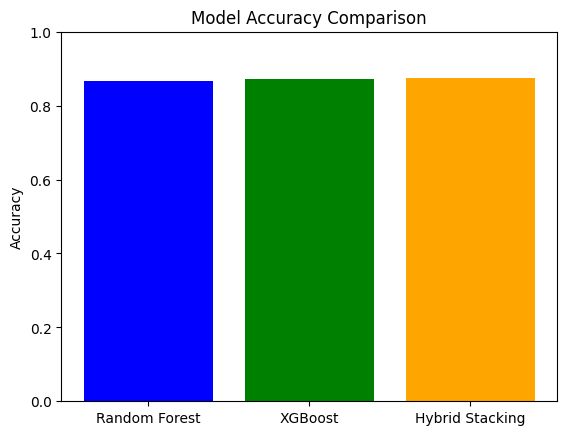

In [ ]:
#Step: Visualization (Graphs)
import matplotlib.pyplot as plt

models = ['Random Forest', 'XGBoost', 'Hybrid Stacking']
accuracies = [0.866, 0.872, 0.875]

plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.ylim(0, 1)
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.show()


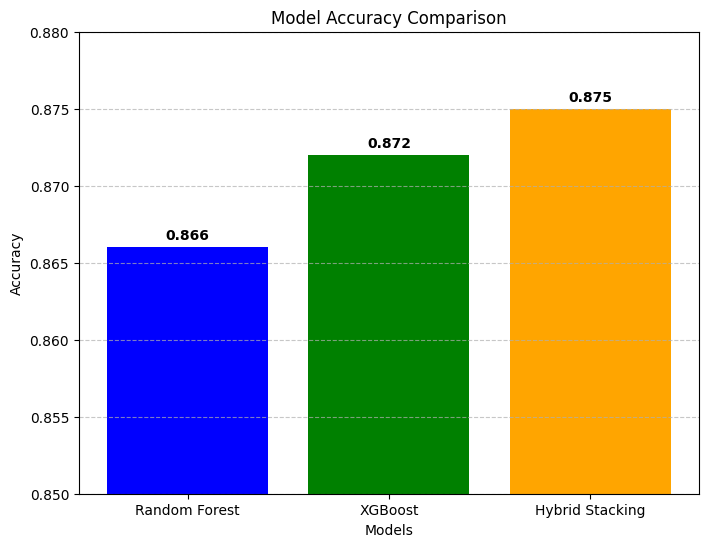

In [1]:
import matplotlib.pyplot as plt

# Accuracy values from your report
models = ['Random Forest', 'XGBoost', 'Hybrid Stacking']
accuracies = [0.866, 0.872, 0.875]  # Replace with your exact values if needed

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'orange'])
plt.ylim(0.85, 0.88)  # Zoom in on the range for better visibility
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.0005, f'{acc:.3f}', ha='center', fontweight='bold')

# Save the plot as a PNG (or PDF for higher quality)
plt.savefig('model_accuracy_bar_chart.png', dpi=300, bbox_inches='tight')
plt.show()  # Optional: Display in notebook